In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [117]:
data = pd.read_csv('valorant_weapons.csv', encoding='unicode_escape')
print(data)

        name       weapon_type  price shooting_penetration cadence_shooting  \
0    CLASSIC  secondary_weapon      0                  low             6,75   
1     SHORTY  secondary_weapon    150                  low             3,33   
2     FRENZY  secondary_weapon    450                  low               10   
3      GHOST  secondary_weapon    500               medium             6,75   
4    SHERIFF  secondary_weapon    800                 high                4   
5    STINGER               SMG    950                  low               16   
6    SPECTRE               SMG   1600                  low            13,33   
7      BUCKY           shotgun    850                  low              1,1   
8      JUDGE           shotgun   1850                  low              3,5   
9    BULLDOG             rifle   2050               medium              9,5   
10  GUARDIAN             rifle   2250                 high             5,25   
11   PHANTOM             rifle   2900               

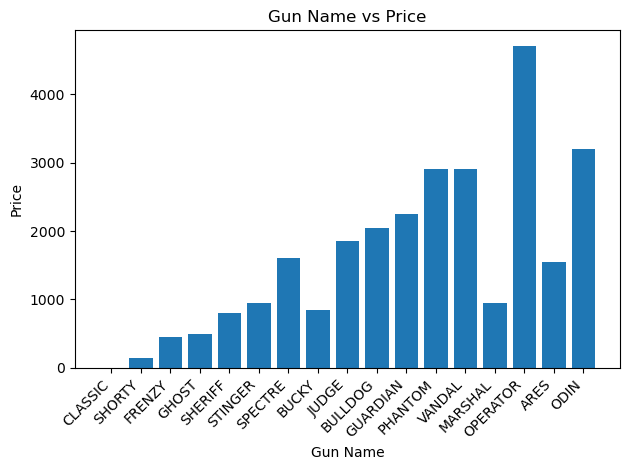

In [120]:
# Show the gun and price
plt.bar(data['name'], data['price'])
plt.title('Gun Name vs Price')
plt.xlabel('Gun Name')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [121]:
# Average price for each weapon_type
weapon_price= data.groupby('weapon_type')
weapon_price.price.mean()

weapon_type
SMG                 1275.0
machine_gun         2375.0
rifle               2525.0
secondary_weapon     380.0
shotgun             1350.0
sniper              2825.0
Name: price, dtype: float64

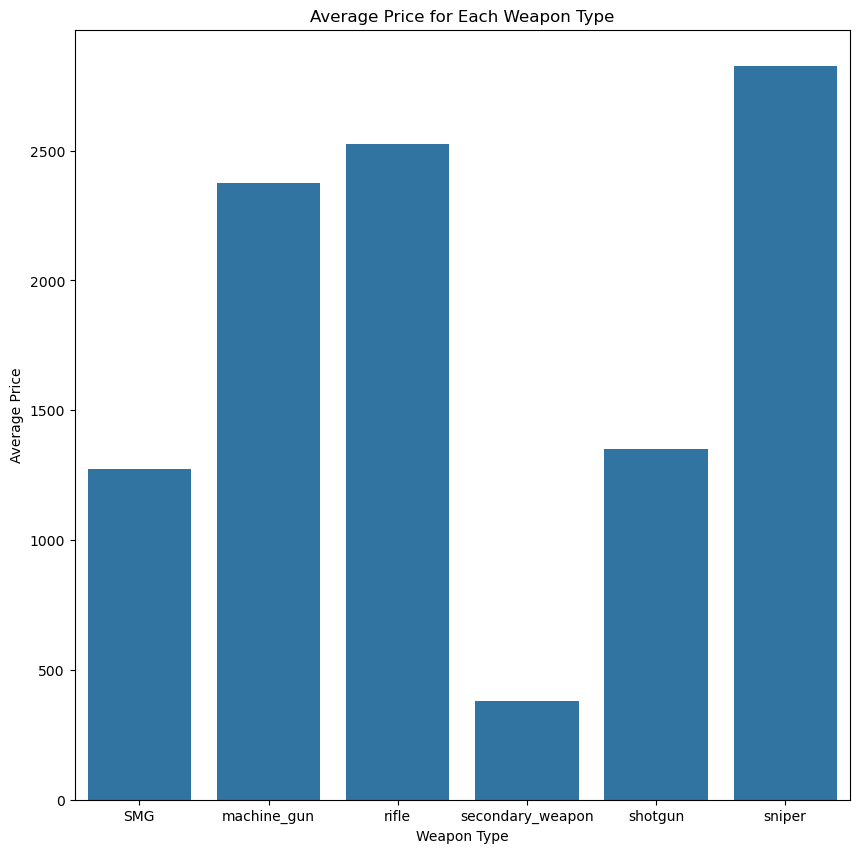

In [122]:
weapon_price = data.groupby('weapon_type')['price'].mean().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(x='weapon_type', y='price', data=weapon_price)
plt.title('Average Price for Each Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Average Price')
plt.show()

In [125]:
# Secondary weapon stats
secondary_weapons = data[data['weapon_type'] == 'secondary_weapon']
print(secondary_weapons)

      name       weapon_type  price shooting_penetration cadence_shooting  \
0  CLASSIC  secondary_weapon      0                  low             6,75   
1   SHORTY  secondary_weapon    150                  low             3,33   
2   FRENZY  secondary_weapon    450                  low               10   
3    GHOST  secondary_weapon    500               medium             6,75   
4  SHERIFF  secondary_weapon    800                 high                4   

  shooting_on_run velocity_to_equip dispersion_bullet dispersion_bullet_scope  \
0            5,73              0,75               0,4                     0,4   
1             5,4              0,75                 4                    1,75   
2            5,73                 1              0,45                    0,45   
3            5,73              0,75               0,3                     0,3   
4             5,4                 1              0,25                    0,25   

  velocity_recharge  bullets_on_charging  HDMR  BD

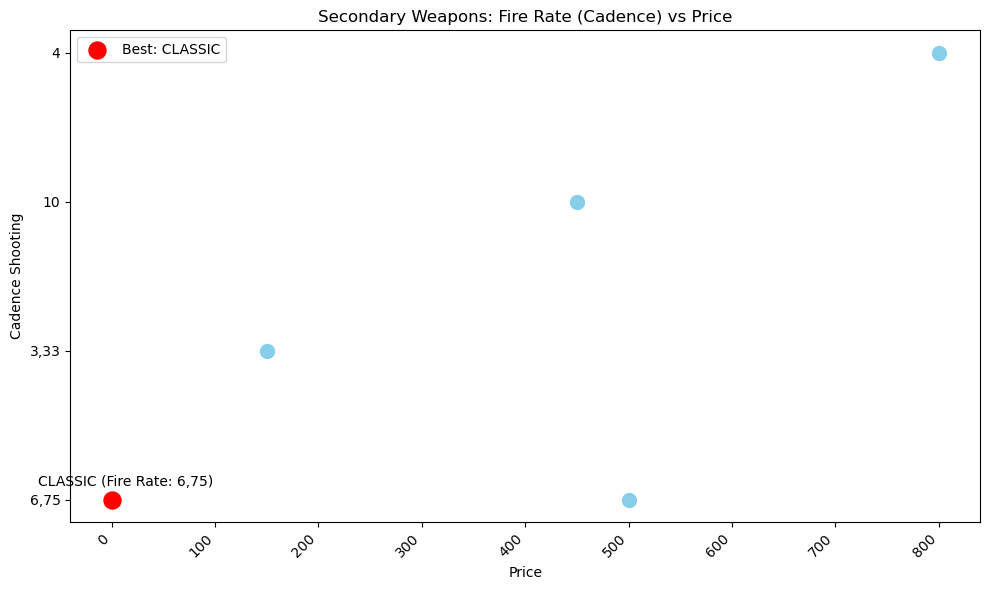

In [127]:
# Plot cadence shooting vs price
plt.figure(figsize=(10, 6))
plt.scatter(secondary_weapons['price'], secondary_weapons['cadence_shooting'], color='skyblue', s=100)

# Best firing rate
best_fire_rate = secondary_weapons.loc[secondary_weapons['cadence_shooting'].idxmax()]
plt.scatter(best_fire_rate['price'], best_fire_rate['cadence_shooting'], color='red', s=150, label=f"Best: {best_fire_rate['name']}")

# Show in graph
plt.title('Secondary Weapons: Fire Rate (Cadence) vs Price')
plt.xlabel('Price')
plt.ylabel('Cadence Shooting')
plt.xticks(rotation=45, ha='right')

# Annotate the best weapon
plt.annotate(f"{best_fire_rate['name']} (Fire Rate: {best_fire_rate['cadence_shooting']})", 
             (best_fire_rate['price'], best_fire_rate['cadence_shooting']),
             textcoords="offset points", xytext=(10,10), ha='center')

plt.legend()
plt.tight_layout()
plt.show()

In [129]:
# Show the best secondary weapon with the highest penetration and best cadence shooting
# Filter the data to include only secondary weapons
secondary_weapons = data[data['weapon_type'] == 'secondary_weapon'].copy()

# Convert shooting penetration to a numerical value for sorting (high = 3, medium = 2, low = 1)
penetration_mapping = {'low': 1, 'medium': 2, 'high': 3}
secondary_weapons.loc[:,'penetration_numeric'] = secondary_weapons['shooting_penetration'].map(penetration_mapping)

# Sort by shooting penetration (descending) and cadence shooting (descending)
best_secondary_weapon = secondary_weapons.sort_values(by=['penetration_numeric', 'cadence_shooting'], ascending=[False, False]).iloc[0]

# Display the result
best_secondary_weapon[['name', 'price', 'cadence_shooting', 'shooting_penetration']]

name                    SHERIFF
price                       800
cadence_shooting              4
shooting_penetration       high
Name: 4, dtype: object

In [132]:
# Rifle stats
rifle_weapons = data[data['weapon_type'] == 'rifle']
print(rifle_weapons)

        name weapon_type  price shooting_penetration cadence_shooting  \
9    BULLDOG       rifle   2050               medium              9,5   
10  GUARDIAN       rifle   2250                 high             5,25   
11   PHANTOM       rifle   2900               medium               11   
12    VANDAL       rifle   2900               medium             9,75   

   shooting_on_run velocity_to_equip dispersion_bullet  \
9              5,4                 1               0,3   
10             5,4                 1               0,1   
11             5,4                 1               0,2   
12             5,4                 1              0,25   

   dispersion_bullet_scope velocity_recharge  bullets_on_charging  HDMR  BDMR  \
9                      0,3               2,5                   24   115    35   
10                       0               2,5                   12   195    65   
11                    0,11               2,5                   30   140   124   
12                 

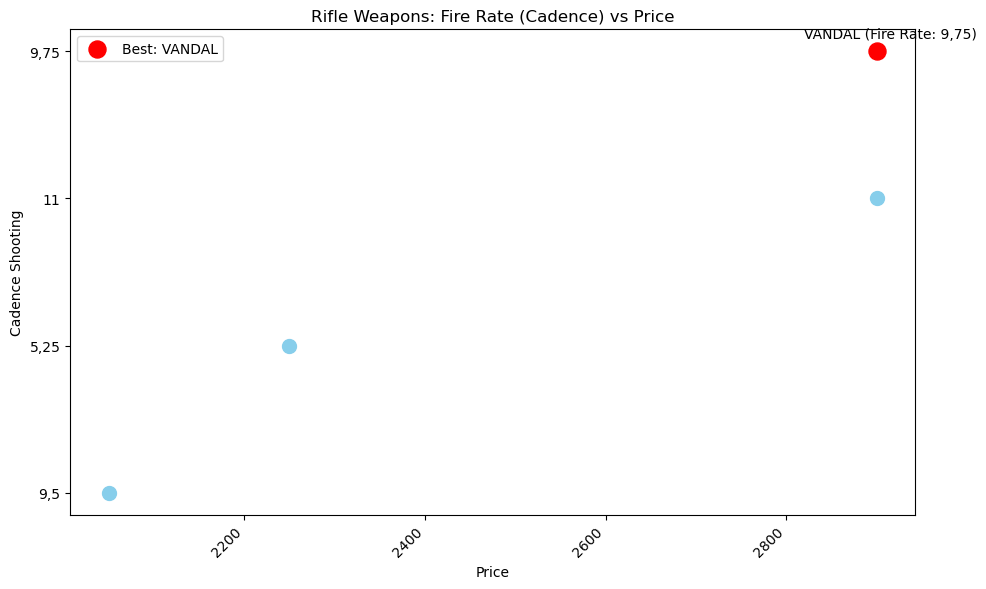

In [134]:
# Plot cadence shooting vs price
plt.figure(figsize=(10, 6))
plt.scatter(rifle_weapons['price'], rifle_weapons['cadence_shooting'], color='skyblue', s=100)

# Best firing rate
best_fire_rate = rifle_weapons.loc[rifle_weapons['cadence_shooting'].idxmax()]
plt.scatter(best_fire_rate['price'], best_fire_rate['cadence_shooting'], color='red', s=150, label=f"Best: {best_fire_rate['name']}")

# Show in graph
plt.title('Rifle Weapons: Fire Rate (Cadence) vs Price')
plt.xlabel('Price')
plt.ylabel('Cadence Shooting')
plt.xticks(rotation=45, ha='right')

# Annotate the best weapon
plt.annotate(f"{best_fire_rate['name']} (Fire Rate: {best_fire_rate['cadence_shooting']})", 
             (best_fire_rate['price'], best_fire_rate['cadence_shooting']),
             textcoords="offset points", xytext=(10,10), ha='center')

plt.legend()
plt.tight_layout()
plt.show()

In [136]:
# Show the best rifle weapon with the highest penetration and best cadence shooting
# Filter the data to include only rifle weapons
rifle_weapons = data[data['weapon_type'] == 'rifle'].copy()

rifle_weapons.loc[:,'penetration_numeric'] = rifle_weapons['shooting_penetration'].map(penetration_mapping)

# Sort by shooting penetration (descending) and cadence shooting (descending)
best_rifle_weapon = rifle_weapons.sort_values(by=['penetration_numeric', 'cadence_shooting'], ascending=[False, False]).iloc[0]

# Display the result
best_rifle_weapon[['name', 'price', 'cadence_shooting', 'shooting_penetration']]

name                    GUARDIAN
price                       2250
cadence_shooting            5,25
shooting_penetration        high
Name: 10, dtype: object

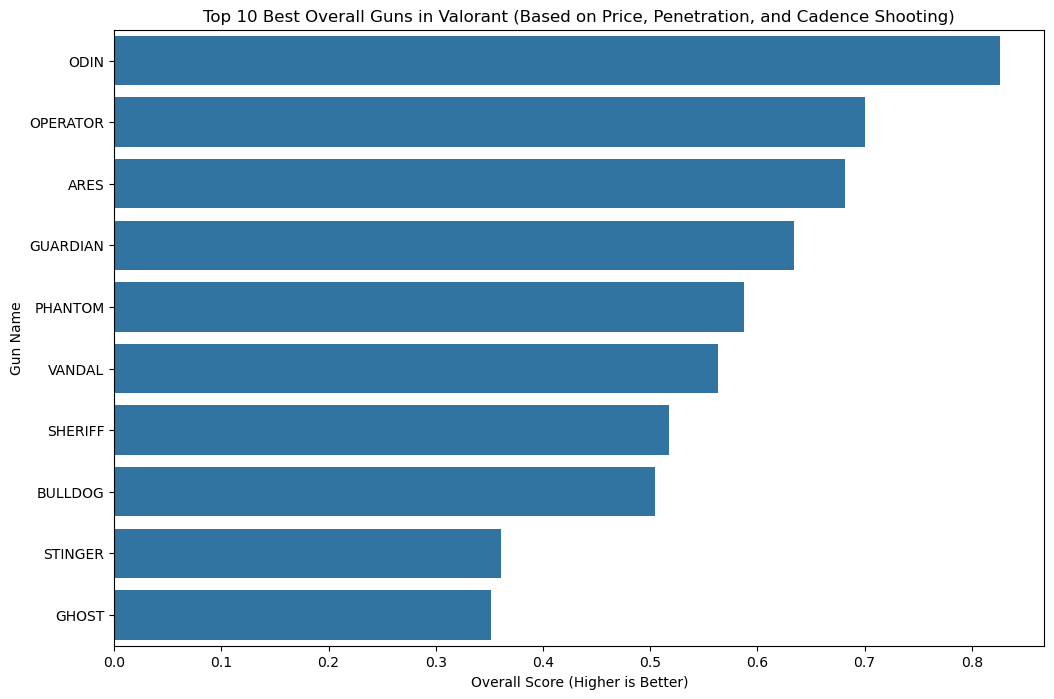

In [157]:
# The best overall guns in valorant based on price, highest penetration and best cadence shooting
data.loc[:,'penetration_numeric'] = data['shooting_penetration'].map(penetration_mapping)

# Normalize the columns: Price, Penetration and Cadence Shooting
scaler = MinMaxScaler()

# Select the columns we want to normalize
normalize_columns = ['price', 'penetration_numeric', 'cadence_shooting']

for col in normalize_columns:
    # Replace comma with dot
    data[col] = data[col].replace({',': '.'}, regex=True)  
    # Convert to numeric, coercing errors to NaN
    data[col] = pd.to_numeric(data[col], errors='coerce') 

# Apply normalization (scaling them to range 0-1)
data[normalize_columns] = scaler.fit_transform(data[normalize_columns])

# Assign weights to each criterion (adjust these weights as needed)
weights = {
    'price': 0.3,           # Less weight to price (higher price may not always be better)
    'penetration_numeric': 0.4,  # More weight to penetration (more important)
    'cadence_shooting': 0.3    # Balanced weight to cadence shooting
}

# Calculate the overall score
data['overall_score'] = (
    data['price'] * weights['price'] +
    data['penetration_numeric'] * weights['penetration_numeric'] +
    data['cadence_shooting'] * weights['cadence_shooting']
)

# Sort the guns by overall score (higher score is better)
best_guns = data.sort_values(by='overall_score', ascending=False)

# Select the top 10 best guns for visualization
top_best_guns = best_guns.head(10)

# Plot a bar chart showing the guns and their overall scores
plt.figure(figsize=(12, 8))
sns.barplot(x='overall_score', y='name', data=top_best_guns)
plt.title('Top 10 Best Overall Guns in Valorant (Based on Price, Penetration, and Cadence Shooting)')
plt.xlabel('Overall Score (Higher is Better)')
plt.ylabel('Gun Name')
plt.show()